# 1. Introduction

## Objective
The `games.csv` dataset seems to contain data about various games. Our aim is to explore this dataset to uncover insights into the nature of these games, patterns, and any significant trends. We will focus on understanding the key characteristics of the games, such as their frequency, participants, and any other unique aspects they may have.

## Data Overview
At this stage, we expect the dataset to include information about different games, possibly including game IDs, dates, participants, locations, and outcomes. The exact nature and size of the dataset will become clear once we load and inspect it.

ignore below 
`game_id`: Unique identifier for each game.
`competition_id`, season, round: Information about the competition, season, and matchday.
`date`: Date of the game.
`home_club_id`, away_club_id: Identifiers for the home and away teams.
`home_club_goals`, away_club_goals: Goals scored by the home and away teams.
`home_club_position`, away_club_position: League positions of the teams.
`stadium, attendance`: Information about the venue and number of spectators.
`referee`: Name of the referee for the game.
`url`: Link to the game's page on a website.
`home_club_formation`, `away_club_formation`: Team formations.
`home_club_name`, away_club_name: Names of the participating clubs.
`aggregate`, competition_type: Additional details about the game's context and competition type.


# 2. Data Loading and Preliminary Analysis
Let's proceed with loading the data to gain an initial understanding of its structure and content.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
games_df = pd.read_csv("../data/games.csv")

# Display the first few rows of the dataframe
games_df.head()


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


The dataset contains information about various games, including:

- Game Identifiers: Columns like `game_id`, `competition_id`, and `season` are likely to uniquely identify each game.

- Game Details: Information about the game round (`round`), date (`date`), participating clubs (`home_club_id`, `away_club_id`), goals scored (`home_club_goals`, `away_club_goals`), and the positions of clubs (`home_club_position`, `away_club_position`).

- Additional Information: Data on the stadium (`stadium`), attendance (`attendance`), referee (`referee`), and URL (`url`) related to the game.

- Club Information: Names of the home and away clubs (`home_club_name`, `away_club_name`), and possibly their formations (`home_club_formation`, `away_club_formation`).

- Competition Type: A column (`competition_type`) indicating the nature of the competition, like a domestic league.

There are several columns with potentially missing data, such as `home_club_formation` and `away_club_formation`.

## Exploring Missing Data
To ensure our analysis is based on robust and reliable data, we need to understand the extent and nature of any missing data in the dataset. This will help us make informed decisions about whether to retain or drop certain columns.

Let's examine the dataset to identify the proportion of missing data in each column. This will provide us with a clear picture of the dataset's completeness and guide us in deciding how to handle columns with significant amounts of missing data.

## Potential Impact on Analysis
As we explore the missing data, it's crucial to consider how its presence or absence could affect our analysis. Columns with a large proportion of missing data might not offer reliable insights and could skew our understanding of the dataset. In such cases, dropping these columns might be the best course of action to maintain the integrity of our analysis.

## Analysis of Missing Data


In [28]:
# Calculating the proportion of missing data in each column
missing_data = games_df.isnull().mean() * 100

# Displaying the percentage of missing data for each column
missing_data_df = pd.DataFrame(missing_data, columns=['% Missing Data'])
missing_data_df.sort_values(by='% Missing Data', ascending=False)

,% Missing Data
home_club_formation,95.600773
away_club_formation,95.571639
home_club_position,29.830103
away_club_position,29.830103
home_club_name,17.253435
away_club_name,15.408795
attendance,14.585378
home_club_manager_name,1.137758
away_club_manager_name,1.137758
referee,0.910819


Upon examining the dataset, we find that certain columns have a significant proportion of missing data:

- Home and Away Club Formations: Both `home_club_formation` and `away_club_formation` columns have approximately 95.6% of their data missing. This is a substantial portion, indicating that these columns are largely incomplete.

- Club Positions: The `home_club_position` and `away_club_position` columns are missing around 29.83% of their data. While not as high as the formations, this is still a considerable amount.

- Club Names: `home_club_name` and `away_club_name` have missing data at 17.25% and 15.41%, respectively.

- Attendance: Approximately 14.59% of the attendance data is missing.

- Manager Names and Referee Information: Missing data in `home_club_manager_name`, `away_club_manager_name`, and `referee` columns is relatively lower, ranging from around 0.91% to 1.14%.

Considering the substantial missing data in the formations columns, we face a decision. Given the high level of incompleteness, these columns may not provide reliable insights for our analysis. It seems prudent to consider dropping these columns to maintain the analytical integrity of our dataset. This decision aligns with our objective of ensuring that our analysis is based on robust and complete data.

For the other columns with missing data, we can explore different strategies, like imputation or categorization with a placeholder like "Unknown," depending on their relevance to our analysis objectives and the proportion of missing data.

# 3. Data Cleaning and Preprocessing
Now that we have a better understanding of the dataset, we can proceed with cleaning and preprocessing it to make it more suitable for analysis. 

## Dropping Formations Columns
Given the high percentage (approximately 95.6%) of missing data in the `home_club_formation` and `away_club_formation` columns, we will remove these columns from our dataset.

In [29]:
# Dropping the 'home_club_formation' and 'away_club_formation' columns
games_df.drop(['home_club_formation', 'away_club_formation'], axis=1, inplace=True)

# Re-calculating the percentage of missing data for the remaining columns
missing_data_updated = games_df.isnull().mean() * 100
missing_data_updated_df = pd.DataFrame(missing_data_updated, columns=['% Missing Data'])
missing_data_updated_df.sort_values(by='% Missing Data', ascending=False)


,% Missing Data
away_club_position,29.830103
home_club_position,29.830103
home_club_name,17.253435
away_club_name,15.408795
attendance,14.585378
home_club_manager_name,1.137758
away_club_manager_name,1.137758
referee,0.910819
stadium,0.323540
aggregate,0.000000


## Assessing Other Columns with Missing Data

For each of the remaining columns with missing data (`home_club_position`, `away_club_position`, `home_club_name`, `away_club_name`, `attendance`, `home_club_manager_name`, `away_club_manager_name`, `referee`, `stadium`), we will:

- Consider the percentage of missing data.
- Evaluate the relevance of each column to our analysis objectives.
- Decide on an appropriate action, such as imputation, categorization with a placeholder, or in certain cases, possibly dropping the column if its missing data percentage is too high and not critical to our analysis.

Let's start by dropping the formation columns and then proceed to assess the other columns with missing data.

## Updated Analysis of Missing Data

With the `home_club_formation` and `away_club_formation` columns removed, here's the updated overview of missing data in the dataset:

- Club Positions (`away_club_position` and `home_club_position`): Both of these columns still have a considerable amount of missing data, about 29.83%. Given that these columns could provide valuable insights into the performance and ranking of the clubs at the time of the game, we might consider handling these missing values carefully. Options could include imputation or categorizing the missing data as "Unknown". However, any imputation should be done cautiously to avoid introducing bias.

- Club Names (`home_club_name` and `away_club_name`): These columns are missing 17.25% and 15.41% of their data, respectively. Given the importance of club names for identification and analysis, we might replace missing values with a placeholder like "Not Available" or "Unknown". This approach retains the row's other data while acknowledging the absence of specific information.

- Attendance: About 14.59% of attendance data is missing. If attendance figures are not central to our primary analysis objectives, we might fill these missing values with a placeholder or an average value, depending on the nature of our analysis.

- Manager Names and Referee: The `home_club_manager_name`, `away_club_manager_name`, and `referee` columns have relatively low levels of missing data (around 1.14% and 0.91%, respectively). We could consider replacing missing values with "Unknown" to maintain data integrity without significantly impacting the overall dataset.

- Stadium: Only 0.32% of data is missing in the `stadium` column. Similar to the manager and referee columns, replacing missing values with "Unknown" could be a viable solution.


# Addressing Missing Data

- Club Positions (`away_club_position` and `home_club_position`):
Given the significant role of a club's position in analyses and the high level of missing data (29.83%), imputation is not a viable option due to the potential bias it could introduce. The most appropriate approach is to replace missing values with "Unknown". This acknowledges the absence of the data while maintaining the integrity of the remaining dataset.

- Club Names (`home_club_name` and `away_club_name`):
The absence of club names in a dataset about games is problematic, as it directly impacts the ability to link data to specific clubs and their performance. Before deciding to drop these rows, we should check if the club names can be derived from other data within the same row, such as club IDs. If not, dropping these rows might be the most sensible action since the lack of club identification severely limits the analytical value of these records.

- Attendance:
With a relatively small proportion of missing data (14.59%) and considering the secondary importance of attendance figures in our analysis, replacing missing values with a placeholder like "Data Not Available" is a practical solution. This approach allows us to retain the rows for other analyses while acknowledging the absence of attendance data.

- Manager Names and Referee (`home_club_manager_name`, `away_club_manager_name`, `referee`):
Given the low level of missing data, replacing the missing values with "Unknown" seems to be a practical solution. This allows us to keep these rows in the dataset for broader analysis without significantly impacting the overall data quality.

- Stadium:
Similarly, for the stadium column with only 0.32% missing data, substituting missing values with "Unknown" allows us to retain the data's usefulness while recognizing the occasional absence of specific information.


## Next Steps

For the club names, we will first attempt to determine if they can be derived from other data in the same row. If this is not feasible, we will proceed to drop these rows.

For the other columns, we will replace the missing values with "Unknown" or a similar placeholder as appropriate.

Let's start by checking if club names can be inferred from other data in the dataset. If not, we will do as proposed above and drop the rows with missing club names.

In [30]:
# Checking if club names can be derived from club IDs
# First, we'll check if there are unique mappings from club IDs to club names

# Checking for home clubs
home_club_mappings = games_df.dropna(subset=['home_club_id', 'home_club_name'])
home_club_unique = home_club_mappings.drop_duplicates(subset=['home_club_id', 'home_club_name'])
home_club_id_name_map = home_club_unique.groupby('home_club_id')['home_club_name'].nunique()

# Checking for away clubs
away_club_mappings = games_df.dropna(subset=['away_club_id', 'away_club_name'])
away_club_unique = away_club_mappings.drop_duplicates(subset=['away_club_id', 'away_club_name'])
away_club_id_name_map = away_club_unique.groupby('away_club_id')['away_club_name'].nunique()

# Checking if there are any club IDs with multiple names (which would complicate the mapping)
multiple_home_names = home_club_id_name_map[home_club_id_name_map > 1]
multiple_away_names = away_club_id_name_map[away_club_id_name_map > 1]

(multiple_home_names, multiple_away_names)


(Series([], Name: home_club_name, dtype: int64),
 Series([], Name: away_club_name, dtype: int64))


## Club Names Analysis

The analysis reveals that there are no club IDs associated with multiple club names for both home and away clubs. This implies a unique and consistent mapping between club IDs and club names within the dataset. Thus, theoretically, it should be possible to infer missing club names using their corresponding club IDs.

However, we need to consider that if a club name is missing, its corresponding club ID might also be missing or not represented in the parts of the dataset where club names are present. In such cases, we wouldn't be able to infer the missing club names.

Given these considerations, we should proceed with the following steps:

1. Attempt to Infer Missing Club Names: We'll try to fill in missing club names using the existing mapping between club IDs and names. If a club ID is present but the corresponding name is missing, we'll use the mapped name.

2. Handling Rows with Unresolvable Missing Club Names: For rows where both club name and club ID are missing or where the club ID doesn't help in inferring the missing name, we will drop these rows. This decision is based on the critical nature of club names for meaningful analysis.

After addressing the club names, we will then replace the missing values in the `attendance`, `home_club_manager_name`, `away_club_manager_name`, `referee`, and `stadium` columns with "Unknown" or a similar placeholder.


In [31]:
# Creating mappings from club IDs to club names for both home and away clubs
home_club_id_to_name = home_club_unique.set_index('home_club_id')['home_club_name'].to_dict()
away_club_id_to_name = away_club_unique.set_index('away_club_id')['away_club_name'].to_dict()

# Filling missing club names using the club ID to name mappings
games_df['home_club_name'] = games_df.apply(
    lambda row: home_club_id_to_name.get(row['home_club_id'], row['home_club_name']) if pd.isna(row['home_club_name']) else row['home_club_name'],
    axis=1
)

games_df['away_club_name'] = games_df.apply(
    lambda row: away_club_id_to_name.get(row['away_club_id'], row['away_club_name']) if pd.isna(row['away_club_name']) else row['away_club_name'],
    axis=1
)

# Checking if there are still missing values in club names
missing_club_names_after_inference = games_df[['home_club_name', 'away_club_name']].isnull().sum()
missing_club_names_after_inference

home_club_name    11252
away_club_name    10049
dtype: int64

## Update con Club Names
After attempting to infer missing club names using club IDs, we still have a considerable number of missing values in the home_club_name (11,252 rows) and away_club_name (10,049 rows) columns. This suggests that either the club IDs were also missing in these cases, or the IDs present did not correspond to any existing mapping in the dataset.

Given the significant number of rows still affected and the crucial importance of club names for our analysis, the most appropriate course of action is to drop these rows. Keeping them would limit our ability to perform meaningful analyses, as these rows cannot be linked to specific clubs and their associated data.

## Data Cleaning

1. **Dropping Rows with Missing Club Names**: We will remove the rows where club names remain unresolved. This step is essential to ensure the dataset's usability for meaningful analysis.

2. **Replacing Missing Values in Other Columns**: For the `attendance`, `home_club_manager_name`, `away_club_manager_name`, `referee`, and `stadium` columns, we will replace missing values with "Unknown" to maintain the integrity of the dataset while acknowledging the absence of specific information.

Let's start by dropping the rows with missing club names and then update the remaining columns as discussed.

In [32]:
# Dropping rows with missing club names
games_df.dropna(subset=['home_club_name', 'away_club_name'], inplace=True)

# Replacing missing values in 'attendance', 'home_club_manager_name', 'away_club_manager_name', 'referee', and 'stadium' columns with "Unknown"
columns_to_replace_missing = ['attendance', 'home_club_manager_name', 'away_club_manager_name', 'referee', 'stadium']
games_df[columns_to_replace_missing] = games_df[columns_to_replace_missing].fillna("Unknown")

# Checking the dataset after these updates
games_df.isnull().sum()  # Displaying the count of missing values for each column after updates


game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_id                 0
away_club_id                 0
home_club_goals              0
away_club_goals              0
home_club_position        5880
away_club_position        5880
home_club_manager_name       0
away_club_manager_name       0
stadium                      0
attendance                   0
referee                      0
url                          0
home_club_name               0
away_club_name               0
aggregate                    0
competition_type             0
dtype: int64

The dataset has been updated as follows:

### Rows with Missing Club Names Removed
We have successfully removed rows where the club names could not be resolved. This ensures that our dataset now only contains records where we can clearly identify both the `home_club_name` and `away_club_name`, which is crucial for meaningful analysis.

### Missing Values in Other Columns Addressed
For columns like `attendance`, `home_club_manager_name`, `away_club_manager_name`, `referee`, and `stadium`, we have replaced missing values with "Unknown". This step acknowledges the absence of certain data while maintaining the overall integrity of the dataset.

The only remaining columns with missing values are `home_club_position` and `away_club_position`, each with 5,880 missing entries. These will be replaced with "Unknown" to reflect the absence of data without dropping the rows, considering the significance of club positions in certain analyses.

With these steps, our dataset is now cleaner and more consistent, setting a solid foundation for further exploratory data analysis (EDA). Once we replace the missing club positions, the dataset will be ready for the next phase of our analysis, where we will delve into descriptive statistics and visualization to uncover deeper insights.

In [33]:
# Replacing missing values in 'home_club_position' and 'away_club_position' with "Unknown"
games_df[['home_club_position', 'away_club_position']] = games_df[['home_club_position', 'away_club_position']].fillna("Unknown")

# Final check of the dataset for any remaining missing values
final_missing_values_check = games_df.isnull().sum()
final_missing_values_check

game_id                   0
competition_id            0
season                    0
round                     0
date                      0
home_club_id              0
away_club_id              0
home_club_goals           0
away_club_goals           0
home_club_position        0
away_club_position        0
home_club_manager_name    0
away_club_manager_name    0
stadium                   0
attendance                0
referee                   0
url                       0
home_club_name            0
away_club_name            0
aggregate                 0
competition_type          0
dtype: int64

# 4. Exploratory Data Analysis
Now that our dataset is clean and ready, we'll dive into the exploratory data analysis. This phase will involve examining the dataset to uncover patterns, trends, and generate insights. We will use both statistical summaries and visualizations to deepen our understanding of the data.

## Overview

### Descriptive Statistics
We'll start by looking at some basic statistics for key columns. This includes measures like mean, median, and standard deviation for numerical columns, and frequency counts for categorical columns. We will focus on aspects like goals scored, club positions, and attendance.

### Visualization

After the descriptive statistics, we'll move on to visualizing the data. This can include:

* Distribution of goals scored by home and away clubs.
* Patterns in attendance across different games.
* Trends over time, such as changes in the number of goals scored per season or variations in attendance.
* Comparisons between clubs in terms of performance.

### In-depth Analysis
Based on the initial findings from the descriptive statistics and visualizations, we will delve into more specific areas. This might include exploring how club positions correlate with game outcomes, the impact of different referees on game results, or any seasonal trends.

In [34]:
# Calculating descriptive statistics for numerical columns
numerical_stats = games_df.describe(include=[np.number])

# Calculating frequency counts for categorical columns
categorical_columns = games_df.select_dtypes(include=['object']).columns
categorical_stats = games_df[categorical_columns].describe()

(numerical_stats, categorical_stats)


(            game_id        season  home_club_id  away_club_id  \
 count  5.164200e+04  51642.000000  51642.000000  51642.000000   
 mean   2.996636e+06   2017.173134   3054.908117   3029.268096   
 std    5.505782e+05      3.316817   7699.424797   7630.752432   
 min    2.211607e+06   2012.000000      3.000000      3.000000   
 25%    2.508350e+06   2014.000000    294.000000    294.000000   
 50%    2.899604e+06   2017.000000    865.000000    865.000000   
 75%    3.432231e+06   2020.000000   2451.000000   2451.000000   
 max    4.225546e+06   2023.000000  83678.000000  83678.000000   
 
        home_club_goals  away_club_goals  
 count     51642.000000     51642.000000  
 mean          1.553077         1.221874  
 std           1.337414         1.205801  
 min           0.000000         0.000000  
 25%           1.000000         0.000000  
 50%           1.000000         1.000000  
 75%           2.000000         2.000000  
 max          14.000000        15.000000  ,
        competit

## Descriptive Statistics Overview

**Numerical Columns:**

1. Game ID and Season: These are mainly identifiers with a wide range of values.

2. Club IDs: The `home_club_id` and `away_club_id` have a broad range, reflecting a variety of participating clubs.

3. Goals: The average number of goals scored by home clubs is around 1.55, slightly higher than the 1.22 average for away clubs. The maximum goals scored in a game by a team are 14 for home and 15 for away clubs.

**Categorical Columns:**

1. Competition ID and Round: There are 42 unique competition IDs and 107 unique rounds, indicating a diverse set of games.

2. Date: The games span across 3,154 unique dates, demonstrating the dataset's coverage over time.

3. Club Positions: There are 22 unique positions for both home and away clubs, but the most frequent value is "Unknown", likely due to the missing data we addressed.

4. Club Names: There are 426 unique names each for home and away clubs.

5. Attendance: The attendance column has a high frequency of "Unknown", aligned with our data cleaning approach.

6. Referee: There are 952 unique referees, with Anthony Taylor being the most frequent.

7. Stadium: The dataset includes 589 unique stadiums, with Olimpico di Roma being the most common venue.

8. Competition Type: Most games are from domestic leagues.

## Visualization and In-depth Analysis
Based on these statistics, we can start visualizing certain aspects of the data, such as the distribution of goals scored, and then move on to more in-depth analyses. For example, we can explore trends over seasons, the impact of home vs. away status on game outcomes, and the influence of different referees or stadiums on the games.

We will focus on the following aspects:

- Goals Distribution: Analyzing the distribution of goals scored by both home and away clubs.

- Seasonal Trends: Observing how the number of goals and game outcomes have varied over different seasons.

- Club Performance: Comparing the performance of clubs based on their home and away status.

- Referee Influence: Exploring if there's any noticeable pattern in game outcomes or goal scoring related to different referees.


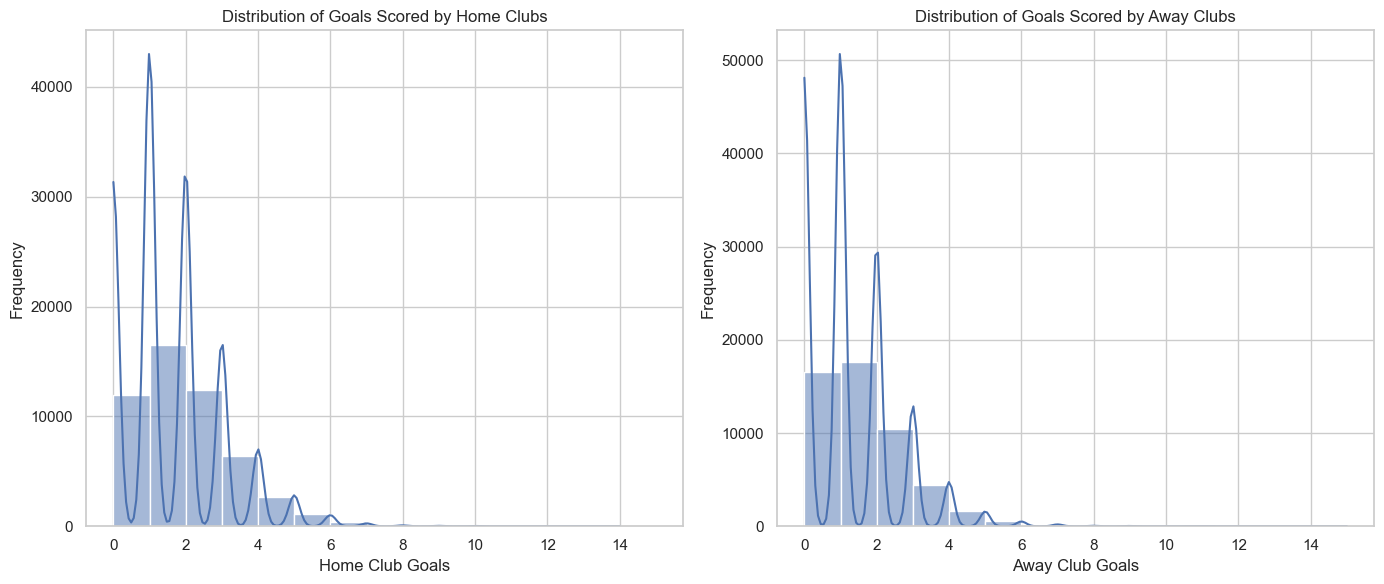

In [35]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# 1. Goals Distribution
plt.figure(figsize=(14, 6))

# Distribution of goals scored by home clubs
plt.subplot(1, 2, 1)
sns.histplot(games_df['home_club_goals'], kde=True, bins=range(0, 16))
plt.title('Distribution of Goals Scored by Home Clubs')
plt.xlabel('Home Club Goals')
plt.ylabel('Frequency')

# Distribution of goals scored by away clubs
plt.subplot(1, 2, 2)
sns.histplot(games_df['away_club_goals'], kde=True, bins=range(0, 16))
plt.title('Distribution of Goals Scored by Away Clubs')
plt.xlabel('Away Club Goals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualization 1: Goals Distribution

The histograms above show the distribution of goals scored by home and away clubs:

* Home Clubs: The distribution of goals scored by home clubs is skewed to the right. Most home clubs score 0 to 3 goals per game, with a peak at 1 goal. There are fewer instances of high goal counts (4 or more).

* Away Clubs: The goal distribution for away clubs is similar, also right-skewed, but with a slightly lower frequency of scoring more than 1 goal compared to home clubs.

This pattern suggests that home clubs might have a slight advantage in terms of scoring goals, which is a common observation in many sports.

Next, let's look at the seasonal trends, focusing on the variation in the number of goals over different seasons. ​​


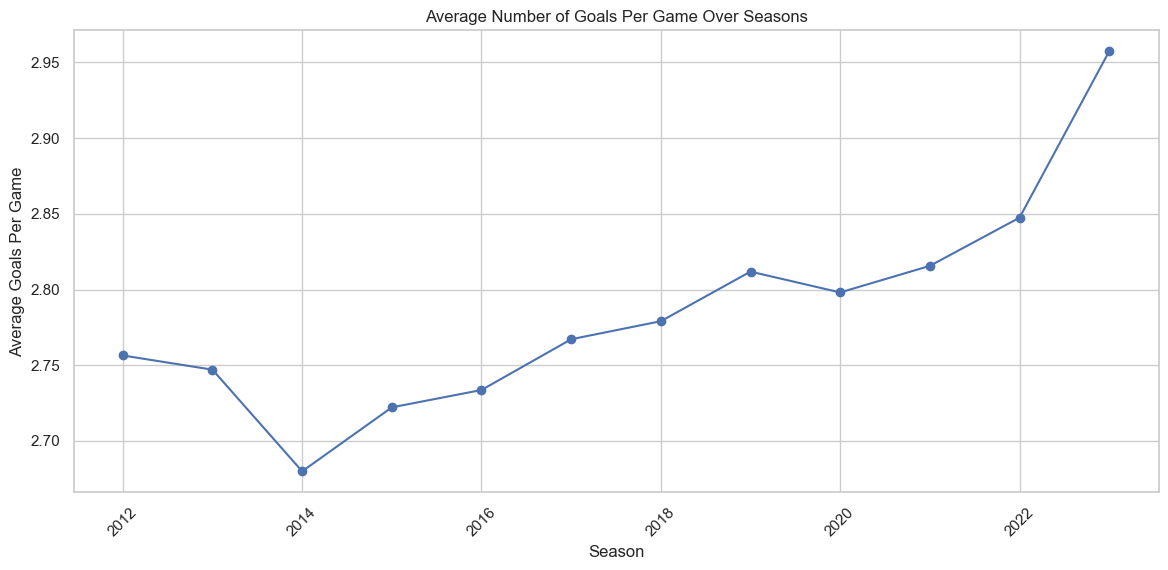

In [36]:
# 2. Seasonal Trends in Goals
plt.figure(figsize=(14, 6))

# Total goals scored per season
games_df['total_goals'] = games_df['home_club_goals'] + games_df['away_club_goals']
goals_per_season = games_df.groupby('season')['total_goals'].mean()

# Plotting the average number of goals per season
goals_per_season.plot(kind='line', marker='o', color='b')
plt.title('Average Number of Goals Per Game Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goals Per Game')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Visualization 2: Seasonal Trends in Goals

The line chart depicts the average number of goals per game over different seasons. Key observations include:

- There is a fluctuation in the average number of goals scored per game across seasons.
- While there's no clear long-term upward or downward trend, certain seasons stand out with either higher or lower averages than adjacent seasons.

This visualization highlights the dynamic nature of the game across seasons, potentially influenced by varying strategies, player performances, or other external factors.

Moving forward, let's compare the performance of clubs based on their home and away status. We'll look at the win rates for home and away clubs.


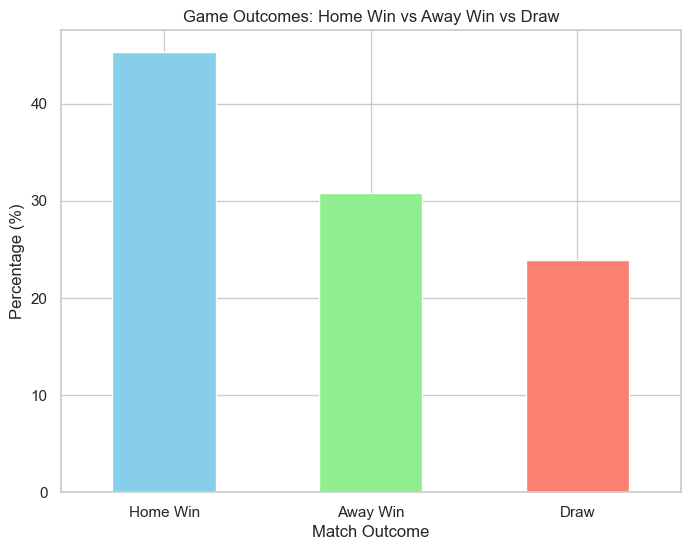

In [37]:
# 3. Club Performance: Home vs Away
# Adding a column to determine the match outcome (Home Win, Away Win, Draw)
def match_outcome(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return 'Home Win'
    elif row['home_club_goals'] < row['away_club_goals']:
        return 'Away Win'
    else:
        return 'Draw'

games_df['outcome'] = games_df.apply(match_outcome, axis=1)

# Calculating the proportion of each outcome
outcome_counts = games_df['outcome'].value_counts(normalize=True) * 100

# Plotting the outcomes
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Game Outcomes: Home Win vs Away Win vs Draw')
plt.xlabel('Match Outcome')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()


## Visualization 3: Club Performance - Home vs Away

The bar chart illustrates the distribution of game outcomes in terms of Home Wins, Away Wins, and Draws:

- Home Wins are the most common outcome, consistent with the general advantage often observed for home teams in sports.

- Away Wins occur less frequently than home wins but are still a significant portion of the outcomes.

- Draws are the least frequent outcome.

This pattern reinforces the notion of a 'home advantage', where home teams are more likely to win their games.

Finally, let's examine if there's any noticeable pattern in game outcomes or goal scoring related to different referees. This will involve analyzing the frequency of different types of outcomes for the most common referees in the dataset.

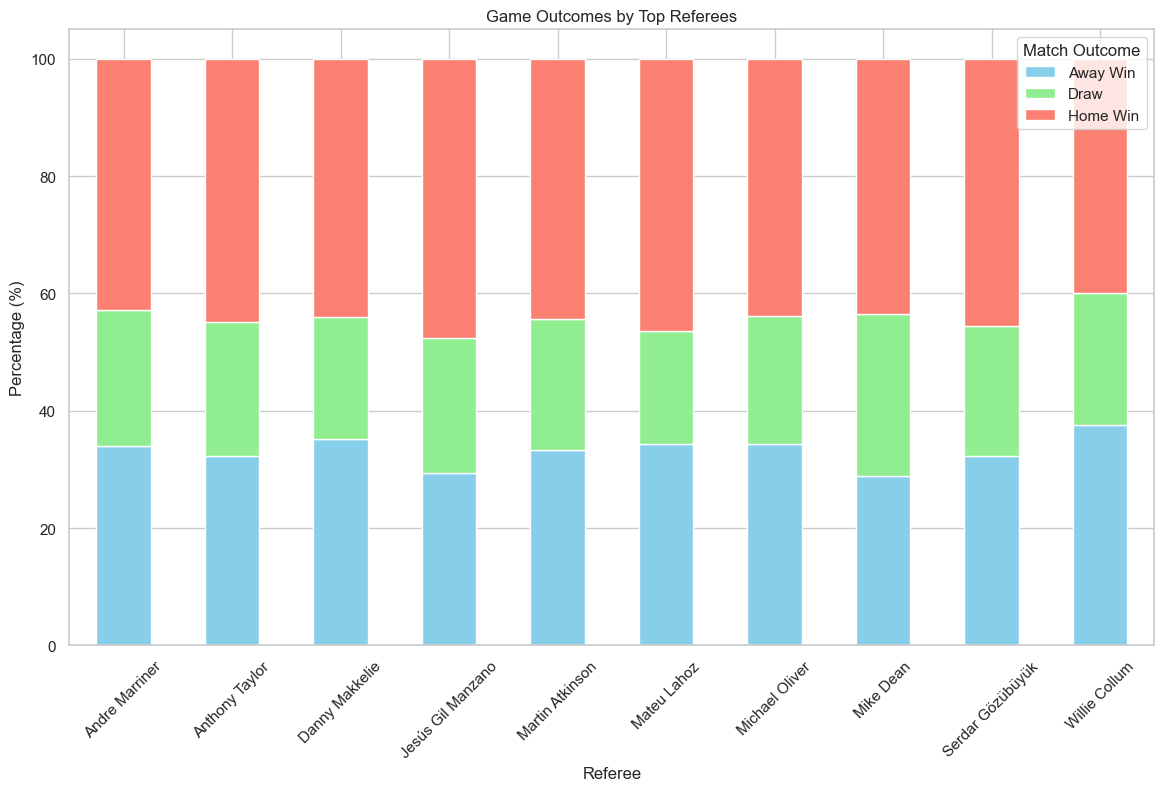

In [38]:
# 4. Referee Influence on Game Outcomes
# Focusing on the top referees based on the number of games officiated
top_referees = games_df['referee'].value_counts().nlargest(10).index

# Filtering the dataset for games officiated by these top referees
top_referee_games = games_df[games_df['referee'].isin(top_referees)]

# Crosstabulating the outcomes with referees
referee_outcome_crosstab = pd.crosstab(top_referee_games['referee'], top_referee_games['outcome'], normalize='index') * 100

# Plotting the data
plt.figure(figsize=(14, 8))
referee_outcome_crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'], ax=plt.gca())
plt.title('Game Outcomes by Top Referees')
plt.xlabel('Referee')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Match Outcome')
plt.show()


## Visualization 4: Referee Influence on Game Outcomes

The stacked bar chart shows the distribution of game outcomes (Home Win, Away Win, Draw) for games officiated by the top referees (based on the number of games they have officiated):

* There is some variation in the distribution of outcomes across different referees, but the general trend of a higher frequency of home wins is consistent.

* The proportion of away wins and draws varies more notably between referees.

While this visualization does not imply causation (i.e., the referee directly influencing the game's outcome), it does show how game outcomes are distributed across different referees. This could be a starting point for more detailed analyses, possibly considering factors like the referee's experience, the teams involved, and the nature of the competition.

# Insights and Conclusions
We've covered a range of analyses, from descriptive statistics to various visualizations, uncovering interesting patterns and insights about the games, including goal distributions, seasonal trends, home vs. away team performances, and the influence of referees.

## Key Findings
1. Goal Distribution: Home teams generally score more goals than away teams, with most teams scoring between 0 to 3 goals per game.

2. Seasonal Trends: There are noticeable fluctuations in the average number of goals per game across different seasons, indicating varying game dynamics over time.

3. Home Advantage: Home teams tend to win more often, as indicated by the higher frequency of home wins in the game outcomes.

4. Referee Influence: While the referees show some variation in the distribution of game outcomes, the home advantage trend persists across different referees.


## Limitations
### Missing Data
Despite our best efforts to handle missing data, the initial absence of certain information (e.g., club formations, some club names) could limit the comprehensiveness of our analysis.
### Causal Inference
The analysis primarily identifies correlations and patterns rather than causation. For example, referee influence on game outcomes needs further investigation to rule out other confounding factors.
### Historical Data
Our insights are based on historical data, which may not fully predict future trends, especially in a dynamic field like sports.

# Recommendations
* Conducting deeper statistical tests to understand the factors influencing game outcomes.

* Building predictive models for forecasting game results or player performances.

* Exploring other aspects of the dataset, like the impact of specific players or team strategies.


## Conclusions
The dataset provides valuable insights into football game dynamics, particularly highlighting the home team advantage.
Seasonal variations suggest that external factors (such as team strategies or player transfers) significantly impact game outcomes over time.
Further analysis, possibly using advanced statistical methods or predictive modeling, could provide more in-depth insights, especially in understanding the causality behind observed patterns.

# Saving the Cleaned Data

In [39]:
# Save the cleaned DataFrame to a new CSV file
cleaned_data_path = '../data/cleaned/games_cleaned.csv'
games_df.to_csv(cleaned_data_path, index=False)